# EDA EVADOC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import stanza
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos (ajusta la ruta si es necesario)
ruta = r"C:\Users\alvar\Downloads\comentarios_202510.xlsx"
df = pd.read_excel(ruta, sheet_name='PR202510')

# Limpieza mínima: eliminar filas donde Comentarios está vacío
df = df.dropna(subset=['Comentarios'])
df['Comentarios'] = df['Comentarios'].astype(str).str.strip()


c:\Users\alvar\anaconda3\envs\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# DataFrame listo para análisis posteriores (univariado, multivariado, etc.)
df_clean = df.copy()

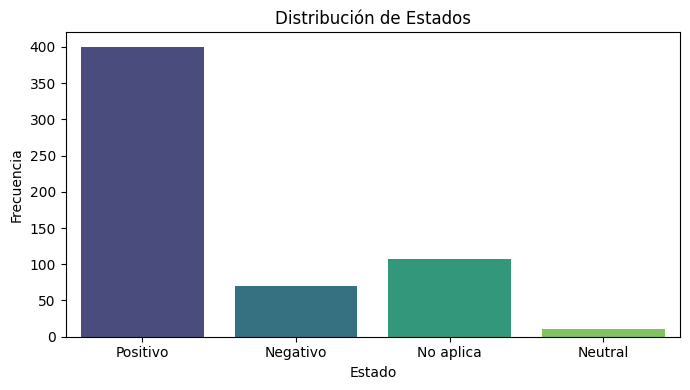

In [3]:
# Conteo de palabras por comentario
df['n_palabras'] = df['Comentarios'].apply(lambda x: len(x.split()))

# Visualizaciones generales

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Estado', palette='viridis')
plt.title("Distribución de Estados")
plt.ylabel("Frecuencia")
plt.xlabel("Estado")
plt.tight_layout()
plt.show()


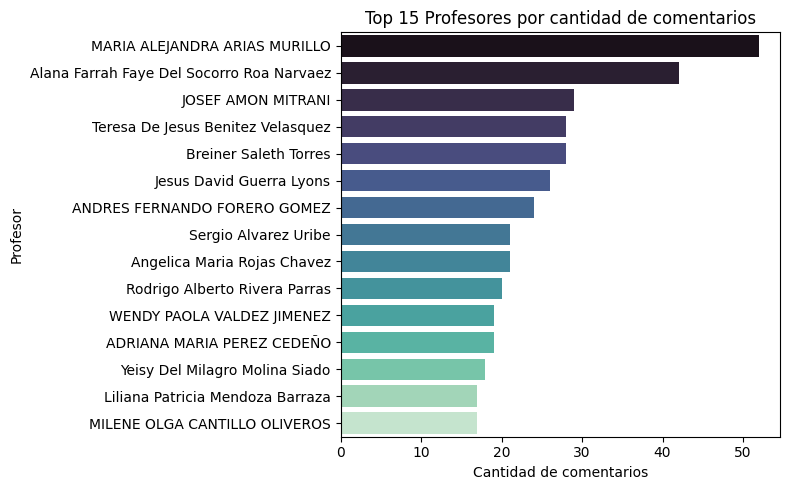

In [4]:
top_profesores = df['Profesor'].value_counts().head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_profesores.values, y=top_profesores.index, palette='mako')
plt.title("Top 15 Profesores por cantidad de comentarios")
plt.xlabel("Cantidad de comentarios")
plt.ylabel("Profesor")
plt.tight_layout()
plt.show()


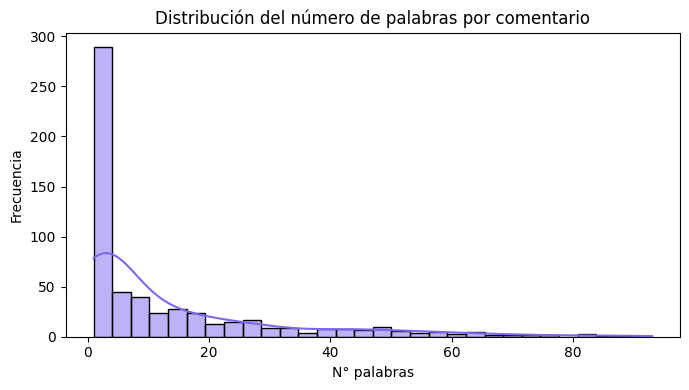

In [5]:
plt.figure(figsize=(7,4))
sns.histplot(df['n_palabras'], bins=30, kde=True, color='mediumslateblue')
plt.title("Distribución del número de palabras por comentario")
plt.xlabel("N° palabras")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


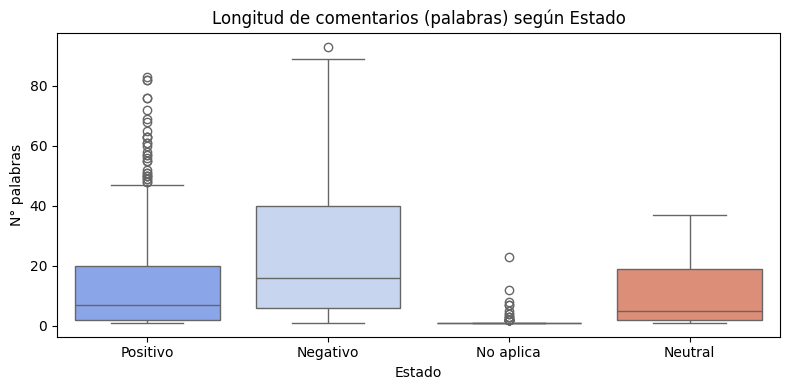

Estadísticas de longitud de comentarios (palabras):
count    587.000000
mean      13.596252
std       18.017687
min        1.000000
25%        2.000000
50%        5.000000
75%       18.000000
max       93.000000
Name: n_palabras, dtype: float64


In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Estado', y='n_palabras', palette='coolwarm')
plt.title("Longitud de comentarios (palabras) según Estado")
plt.xlabel("Estado")
plt.ylabel("N° palabras")
plt.tight_layout()
plt.show()

print("Estadísticas de longitud de comentarios (palabras):")
print(df['n_palabras'].describe())


In [7]:
# Nube de palabras con filtrado por Stanza
# stanza.download('es', verbose=False)
nlp = stanza.Pipeline(lang='es', processors='tokenize,pos,lemma', verbose=False)

def obtener_lemas(texto):
    doc = nlp(texto)
    lemas = [
        w.lemma.lower() for sent in doc.sentences for w in sent.words
        if w.upos not in {'PUNCT', 'NUM', 'DET', 'PRON', 'ADP', 'CCONJ', 'SCONJ', 'PART', 'AUX'}
        and w.lemma.isalpha()
    ]
    return lemas


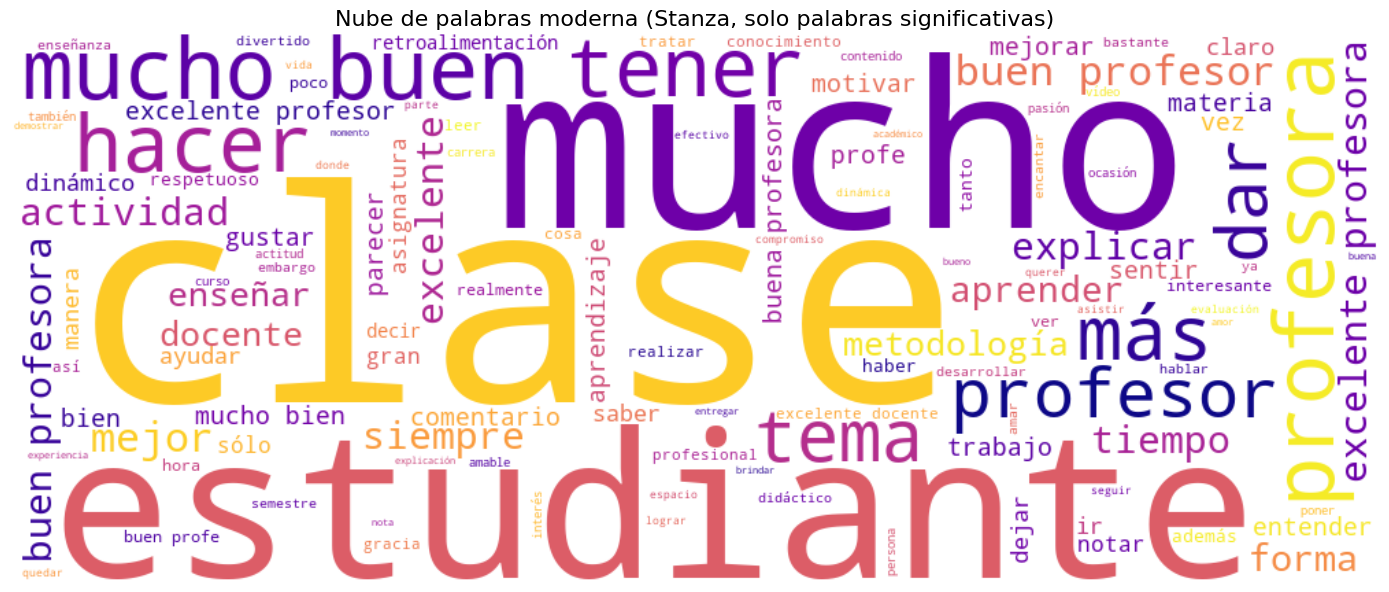

In [8]:
# Unir todos los comentarios en un solo texto y obtener lemas filtrados
all_text = " ".join(df['Comentarios'])
lemas_filtrados = obtener_lemas(all_text)
texto_filtrado = " ".join(lemas_filtrados)

wordcloud = WordCloud(
    width=1000, height=400, background_color='white',
    colormap='plasma', max_words=120, contour_width=2, contour_color='deepskyblue'
).generate(texto_filtrado)

plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras moderna (Stanza, solo palabras significativas)", fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
# Top 20 comentarios más largos (por n_palabras)
top20 = df.sort_values('n_palabras', ascending=False).head(20)[['Profesor', 'Estado', 'n_palabras', 'Comentarios']]
print("\nTop 20 comentarios más extensos:")
print(top20.to_string(index=False))


Top 20 comentarios más extensos:
                                 Profesor   Estado  n_palabras                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Comentarios
            MARIA ALEJANDRA ARIAS MURILLO Negativo          93 Sinceramente no comprendo cómo puede ser una persona ?docente? y que no se le note ninguna clase de compasión por una persona así se haya esforzado. Siento que tiene una metodología super cerrada donde piensa que com una sola clase se va entender y comprender todos los temas para después hacer quiz, lo que a mi parecer es completamente i

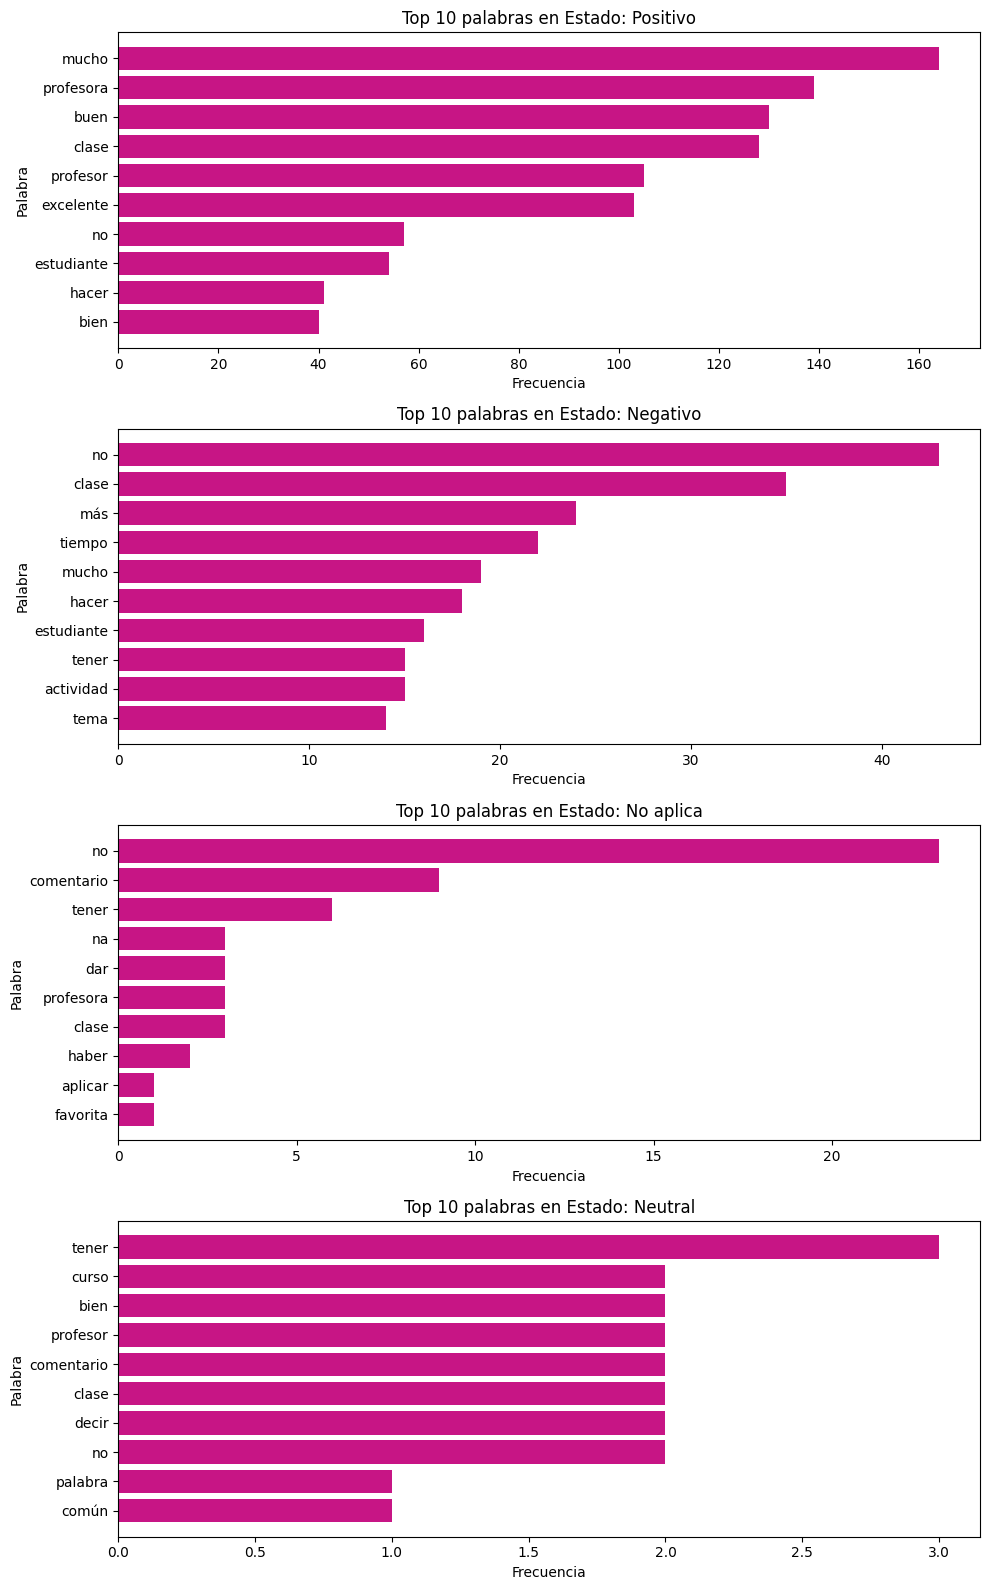

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Primero, creamos un DataFrame con el top10 de cada Estado
top_palabras_list = []

for estado in df['Estado'].unique():
    comentarios = df.loc[df['Estado'] == estado, 'Comentarios']
    all_text = " ".join(comentarios)
    lemas = obtener_lemas(all_text)
    contador = Counter(lemas)
    for palabra, freq in contador.most_common(10):
        top_palabras_list.append({'Estado': estado, 'Palabra': palabra, 'Frecuencia': freq})

top_palabras_df = pd.DataFrame(top_palabras_list)

# Gráficos: un panel por cada Estado
estados = top_palabras_df['Estado'].unique()
n_estados = len(estados)
fig, axes = plt.subplots(n_estados, 1, figsize=(10, 4*n_estados))

if n_estados == 1:
    axes = [axes]  # para hacer iterable si solo hay un Estado

for i, estado in enumerate(estados):
    data = top_palabras_df[top_palabras_df['Estado'] == estado].sort_values('Frecuencia', ascending=True)
    axes[i].barh(data['Palabra'], data['Frecuencia'], color='mediumvioletred')
    axes[i].set_title(f"Top 10 palabras en Estado: {estado}")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel("Palabra")

plt.tight_layout()
plt.show()


# Sin "No aplica"

In [11]:
# Limpieza: Eliminar comentarios vacíos y "No aplica"
df = df.dropna(subset=['Comentarios'])
df['Comentarios'] = df['Comentarios'].astype(str).str.strip()
df = df[df['Estado'].str.lower() != "no aplica"]
df = df[df['Estado'].str.lower() != "no aplica."]


In [12]:
# Conteo de palabras por comentario
df['n_palabras'] = df['Comentarios'].apply(lambda x: len(x.split()))


In [13]:
# Estadísticas descriptivas básicas
print("\nEstadísticas de longitud de comentarios (palabras):")
print(df['n_palabras'].describe())

print("\nDistribución de Estados:")
print(df['Estado'].value_counts())

print("\nCantidad de profesores únicos:", df['Profesor'].nunique())



Estadísticas de longitud de comentarios (palabras):
count    480.000000
mean      16.237500
std       18.902172
min        1.000000
25%        3.000000
50%        8.000000
75%       23.000000
max       93.000000
Name: n_palabras, dtype: float64

Distribución de Estados:
Estado
Positivo    400
Negativo     70
Neutral      10
Name: count, dtype: int64

Cantidad de profesores únicos: 36


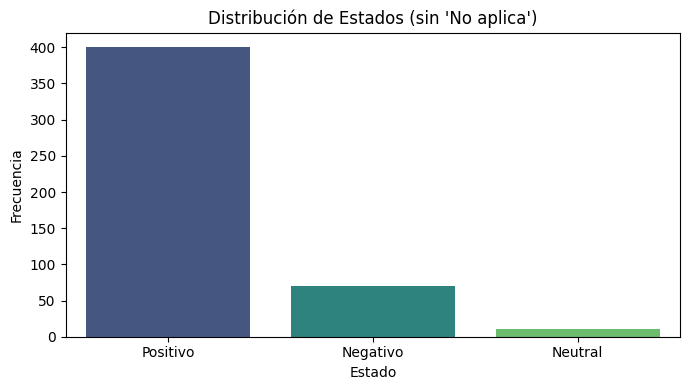

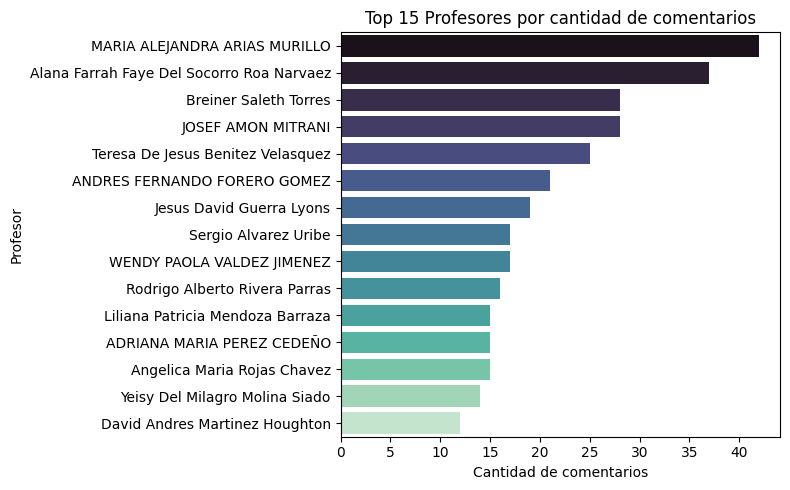

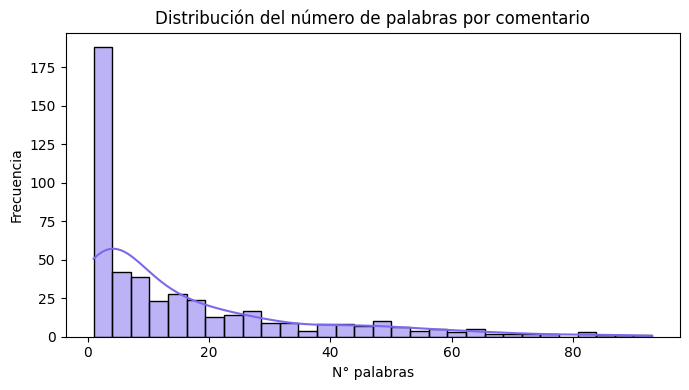

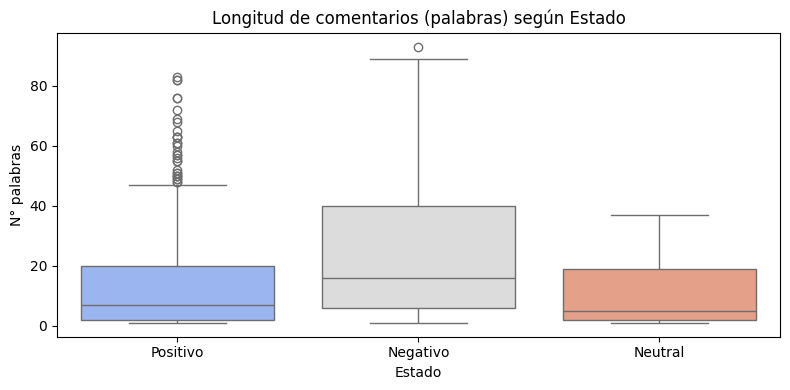

In [14]:
# Visualizaciones generales
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Estado', palette='viridis')
plt.title("Distribución de Estados (sin 'No aplica')")
plt.ylabel("Frecuencia")
plt.xlabel("Estado")
plt.tight_layout()
plt.show()

top_profesores = df['Profesor'].value_counts().head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_profesores.values, y=top_profesores.index, palette='mako')
plt.title("Top 15 Profesores por cantidad de comentarios")
plt.xlabel("Cantidad de comentarios")
plt.ylabel("Profesor")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(df['n_palabras'], bins=30, kde=True, color='mediumslateblue')
plt.title("Distribución del número de palabras por comentario")
plt.xlabel("N° palabras")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Estado', y='n_palabras', palette='coolwarm')
plt.title("Longitud de comentarios (palabras) según Estado")
plt.xlabel("Estado")
plt.ylabel("N° palabras")
plt.tight_layout()
plt.show()


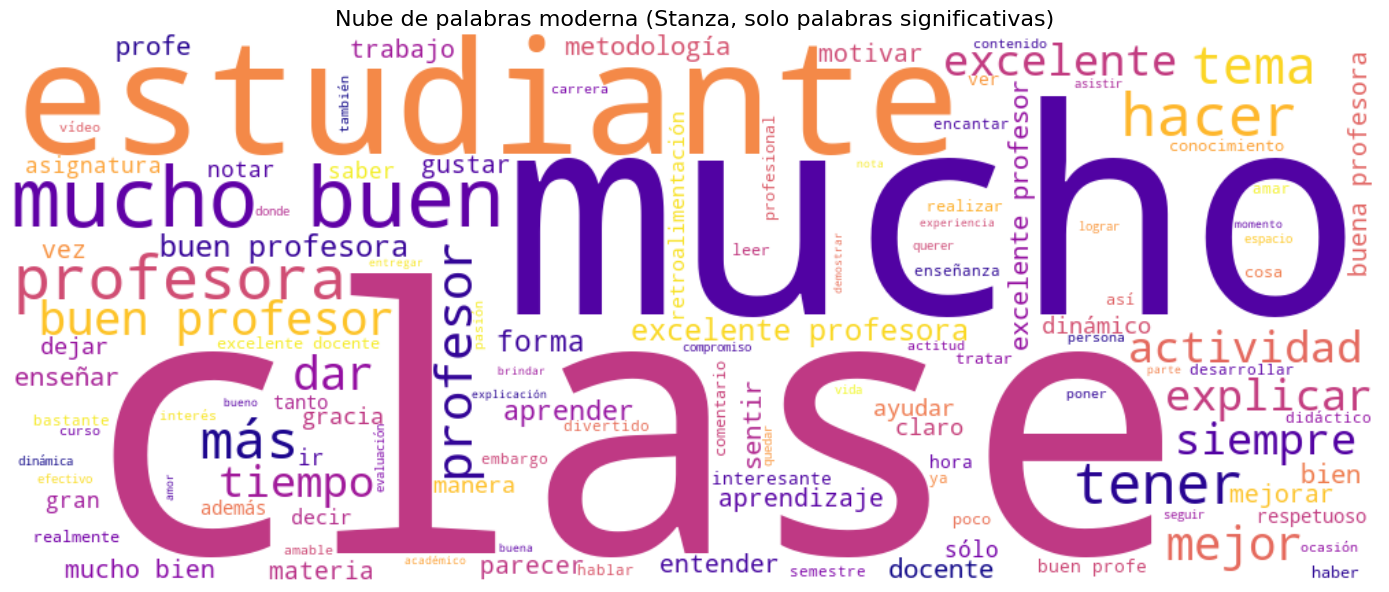

In [15]:
# Nube de palabras filtrada por Stanza (palabras significativas)
# stanza.download('es', verbose=False)
nlp = stanza.Pipeline(lang='es', processors='tokenize,pos,lemma', verbose=False)

def obtener_lemas(texto):
    doc = nlp(texto)
    lemas = [
        w.lemma.lower() for sent in doc.sentences for w in sent.words
        if w.upos not in {'PUNCT', 'NUM', 'DET', 'PRON', 'ADP', 'CCONJ', 'SCONJ', 'PART', 'AUX'}
        and w.lemma.isalpha()
    ]
    return lemas

all_text = " ".join(df['Comentarios'])
lemas_filtrados = obtener_lemas(all_text)
texto_filtrado = " ".join(lemas_filtrados)

wordcloud = WordCloud(
    width=1000, height=400, background_color='white',
    colormap='plasma', max_words=120, contour_width=2, contour_color='deepskyblue'
).generate(texto_filtrado)

plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras moderna (Stanza, solo palabras significativas)", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
# Top 20 comentarios más largos (por n_palabras)
top20 = df.sort_values('n_palabras', ascending=False).head(20)[['Profesor', 'Estado', 'n_palabras', 'Comentarios']]
print("\nTop 20 comentarios más extensos (sin 'No aplica'):")
print(top20.to_string(index=False))



Top 20 comentarios más extensos (sin 'No aplica'):
                                 Profesor   Estado  n_palabras                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Comentarios
            MARIA ALEJANDRA ARIAS MURILLO Negativo          93 Sinceramente no comprendo cómo puede ser una persona ?docente? y que no se le note ninguna clase de compasión por una persona así se haya esforzado. Siento que tiene una metodología super cerrada donde piensa que com una sola clase se va entender y comprender todos los temas para después hacer quiz, lo que a mi parecer 

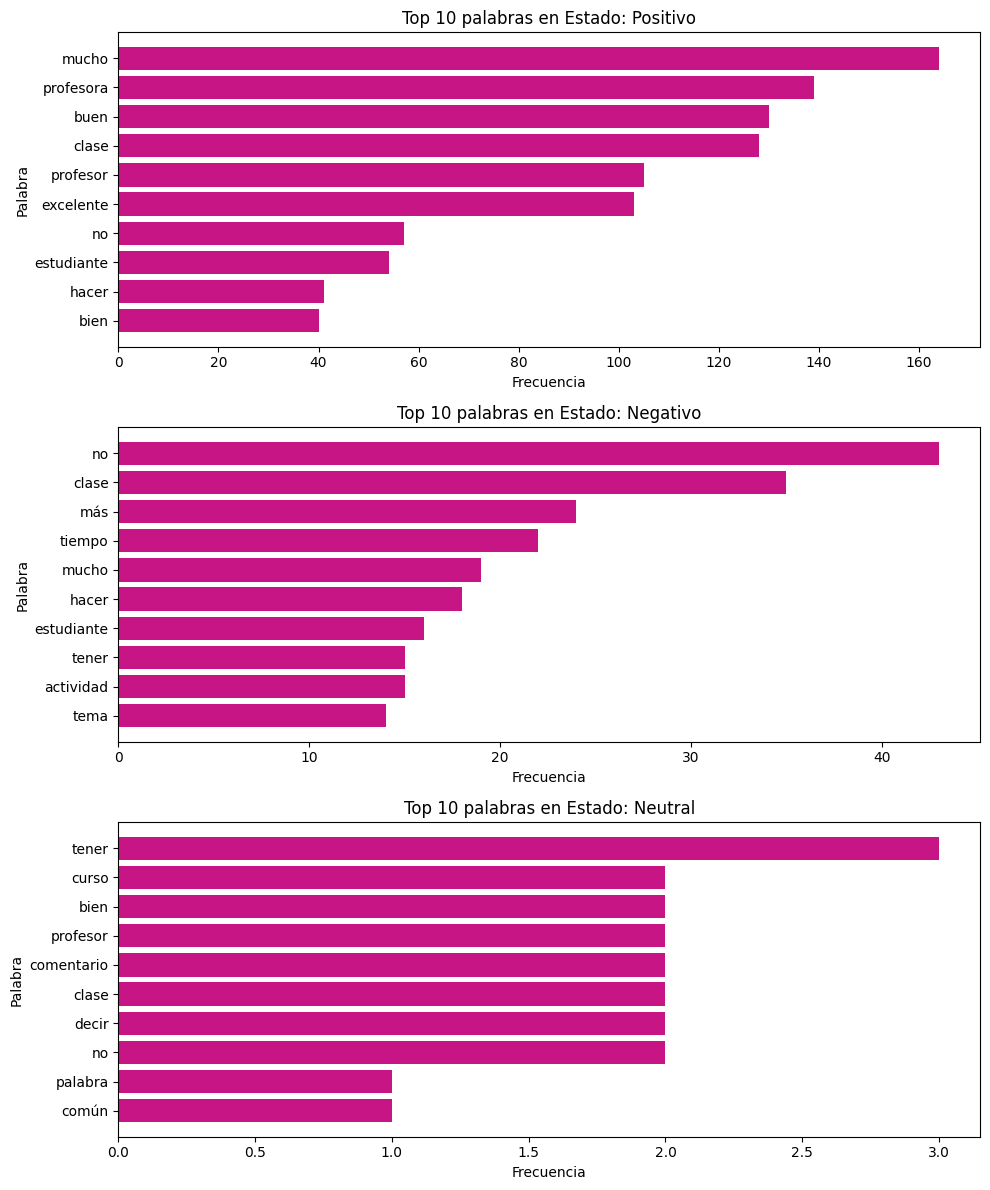

In [17]:
# Top 10 palabras por Estado, en gráfico
top_palabras_list = []

for estado in df['Estado'].unique():
    comentarios = df.loc[df['Estado'] == estado, 'Comentarios']
    all_text = " ".join(comentarios)
    lemas = obtener_lemas(all_text)
    contador = Counter(lemas)
    for palabra, freq in contador.most_common(10):
        top_palabras_list.append({'Estado': estado, 'Palabra': palabra, 'Frecuencia': freq})

top_palabras_df = pd.DataFrame(top_palabras_list)

# Gráficos: un panel por cada Estado
estados = top_palabras_df['Estado'].unique()
n_estados = len(estados)
fig, axes = plt.subplots(n_estados, 1, figsize=(10, 4*n_estados))

if n_estados == 1:
    axes = [axes]  # para hacer iterable si solo hay un Estado

for i, estado in enumerate(estados):
    data = top_palabras_df[top_palabras_df['Estado'] == estado].sort_values('Frecuencia', ascending=True)
    axes[i].barh(data['Palabra'], data['Frecuencia'], color='mediumvioletred')
    axes[i].set_title(f"Top 10 palabras en Estado: {estado}")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel("Palabra")

plt.tight_layout()
plt.show()


In [18]:
if 'n_palabras' not in df_clean.columns:
    df_clean['n_palabras'] = df_clean['Comentarios'].apply(lambda x: len(str(x).split()))


In [19]:
# Filtro "Positivo" y "Negativo"
df_pn = df_clean[df_clean['Estado'].isin(['Positivo', 'Negativo'])].copy()

# Profesor y Estado, contar comentarios
comentarios_profesor = df_pn.groupby(['Profesor', 'Estado']).size().reset_index(name='n_comentarios')

# Top 10 por Estado
top_positivos = comentarios_profesor[comentarios_profesor['Estado'] == 'Positivo'].sort_values('n_comentarios', ascending=False).head(10)
top_negativos = comentarios_profesor[comentarios_profesor['Estado'] == 'Negativo'].sort_values('n_comentarios', ascending=False).head(10)

print("Top 10 profesores con mayor número de comentarios POSITIVOS:")
print(top_positivos[['Profesor', 'n_comentarios']].to_string(index=False))

print("\nTop 10 profesores con mayor número de comentarios NEGATIVOS:")
print(top_negativos[['Profesor', 'n_comentarios']].to_string(index=False))


Top 10 profesores con mayor número de comentarios POSITIVOS:
                                 Profesor  n_comentarios
            MARIA ALEJANDRA ARIAS MURILLO             37
Alana Farrah Faye Del Socorro Roa Narvaez             34
                       JOSEF AMON MITRANI             26
                    Breiner Saleth Torres             23
             ANDRES FERNANDO FORERO GOMEZ             19
               WENDY PAOLA VALDEZ JIMENEZ             16
        Teresa De Jesus Benitez Velasquez             15
            Rodrigo Alberto Rivera Parras             15
              Angelica Maria Rojas Chavez             15
         Liliana Patricia Mendoza Barraza             14

Top 10 profesores con mayor número de comentarios NEGATIVOS:
                                 Profesor  n_comentarios
        Teresa De Jesus Benitez Velasquez             10
                     Sergio Alvarez Uribe              7
   Yanuacelly Cristina Guariguata Birriel              7
                 Jesus

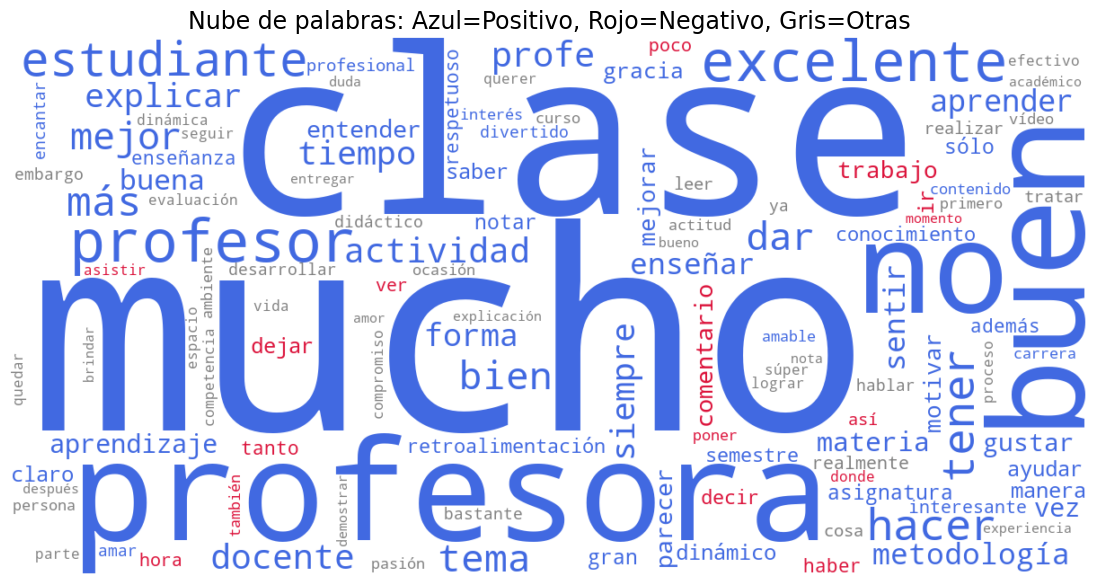

In [20]:
from wordcloud import WordCloud

# Obtén los lemas más frecuentes por clase
lemas_positivo = obtener_lemas(" ".join(df_clean[df_clean['Estado'] == 'Positivo']['Comentarios']))
lemas_negativo = obtener_lemas(" ".join(df_clean[df_clean['Estado'] == 'Negativo']['Comentarios']))

# Top N palabras de cada clase
topN = 60
palabras_positivo = set([w for w, _ in Counter(lemas_positivo).most_common(topN)])
palabras_negativo = set([w for w, _ in Counter(lemas_negativo).most_common(topN)])

# Todas las palabras para la nube
all_lemas = obtener_lemas(" ".join(df_clean['Comentarios']))
frecuencias = Counter(all_lemas)

# Definir función de color personalizado
def color_func(word, *args, **kwargs):
    if word in palabras_positivo:
        return "royalblue"
    elif word in palabras_negativo:
        return "crimson"
    else:
        return "gray"

# Crear y mostrar la nube
wordcloud = WordCloud(
    width=1200, height=600, background_color='white',
    max_words=120, contour_width=2, contour_color='gray'
).generate_from_frequencies(frecuencias)

plt.figure(figsize=(16, 7))
plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras: Azul=Positivo, Rojo=Negativo, Gris=Otras', fontsize=17)
plt.show()


In [21]:
# --- PASO 1: Funciones y preparación de datos de texto ---
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que el pipeline de stanza 'nlp' ya ha sido inicializado en una celda anterior.
# nlp = stanza.Pipeline(lang='es', processors='tokenize,pos,lemma', verbose=False)

def obtener_lemas(texto):
    doc = nlp(texto)
    lemas = [
        w.lemma.lower() for sent in doc.sentences for w in sent.words
        if w.upos not in {'PUNCT', 'NUM', 'DET', 'PRON', 'ADP', 'CCONJ', 'SCONJ', 'PART', 'AUX'}
        and w.lemma.isalpha()
    ]
    return lemas

# Obtén los lemas más frecuentes por clase para la nube de palabras
lemas_positivo = obtener_lemas(" ".join(df_clean[df_clean['Estado'] == 'Positivo']['Comentarios']))
lemas_negativo = obtener_lemas(" ".join(df_clean[df_clean['Estado'] == 'Negativo']['Comentarios']))

# Top N palabras de cada clase
topN = 60
palabras_positivo = set([w for w, _ in Counter(lemas_positivo).most_common(topN)])
palabras_negativo = set([w for w, _ in Counter(lemas_negativo).most_common(topN)])

# Todas las palabras para la nube
all_lemas = obtener_lemas(" ".join(df_clean['Comentarios']))
frecuencias = Counter(all_lemas)

# Función de color para la nube
def color_func(word, *args, **kwargs):
    if word in palabras_positivo:
        return "royalblue"
    elif word in palabras_negativo:
        return "crimson"
    else:
        return "gray"

print("Funciones y datos de texto listos.")

Funciones y datos de texto listos.


In [22]:
# --- PASO 2: Generar y guardar todos los gráficos ---

# Gráfico 1: Nube de Palabras
wordcloud = WordCloud(
    width=1200, height=600, background_color='white',
    max_words=120, contour_width=2, contour_color='gray'
).generate_from_frequencies(frecuencias)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras: Azul=Positivo, Rojo=Negativo, Gris=Otras', fontsize=17)
plt.savefig('nube_palabras.png', bbox_inches='tight')
plt.close()

# Gráfico 2: Top 10 palabras por Estado
top_palabras_list = []
for estado in df['Estado'].unique():
    comentarios = df.loc[df['Estado'] == estado, 'Comentarios']
    all_text = " ".join(comentarios)
    lemas = obtener_lemas(all_text)
    contador = Counter(lemas)
    for palabra, freq in contador.most_common(10):
        top_palabras_list.append({'Estado': estado, 'Palabra': palabra, 'Frecuencia': freq})

top_palabras_df = pd.DataFrame(top_palabras_list)

fig, axes = plt.subplots(len(df['Estado'].unique()), 1, figsize=(10, 5 * len(df['Estado'].unique())))
if len(df['Estado'].unique()) == 1: axes = [axes]

for i, estado in enumerate(df['Estado'].unique()):
    data = top_palabras_df[top_palabras_df['Estado'] == estado].sort_values('Frecuencia', ascending=True)
    sns.barplot(x='Frecuencia', y='Palabra', data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Top 10 palabras en Estado: {estado}")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel("Palabra")

plt.tight_layout()
plt.savefig('top_palabras_estado.png')
plt.close()

# Gráfico 3: Boxplot de longitud de comentarios por Estado
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Estado', y='n_palabras', palette='coolwarm')
plt.title("Longitud de comentarios (palabras) según Estado")
plt.xlabel("Estado")
plt.ylabel("N° palabras")
plt.tight_layout()
plt.savefig('longitud_comentarios_estado.png')
plt.close()

print("Gráficos de análisis de texto guardados.")


Gráficos de análisis de texto guardados.


In [23]:
# --- PASO 3: Convertir DataFrames y estadísticas a HTML ---

# Clases de Tailwind para dar estilo a las tablas
clases_tailwind = 'w-full text-sm text-left text-gray-500'

# Rankings de profesores (ya definidos en celdas anteriores)
tabla_positivos_html = top_positivos[['Profesor', 'n_comentarios']].to_html(index=False, classes=clases_tailwind, border=0)
tabla_negativos_html = top_negativos[['Profesor', 'n_comentarios']].to_html(index=False, classes=clases_tailwind, border=0)

# Estadísticas descriptivas de la longitud de los comentarios
estadisticas_html = df['n_palabras'].describe().to_frame().to_html(classes=clases_tailwind, border=0)

print("Tablas HTML y estadísticas generadas.")

Tablas HTML y estadísticas generadas.


In [24]:
# --- PASO 4: Crear la plantilla y escribir el archivo HTML ---

html_template = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Reporte Dinámico de Análisis de Comentarios</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;500;600;700&display=swap" rel="stylesheet">
    <style>
        body {{ font-family: 'Inter', sans-serif; background-color: #f3f4f6; }}
        .card {{ background-color: white; border-radius: 0.75rem; box-shadow: 0 4px 6px -1px rgb(0 0 0 / 0.1), 0 2px 4px -2px rgb(0 0 0 / 0.1); overflow: hidden; }}
        table {{ width: 100%; border-collapse: collapse; }}
        th, td {{ padding: 0.75rem 1rem; text-align: left; border-bottom: 1px solid #e5e7eb; }}
        th {{ background-color: #f9fafb; font-weight: 600; color: #374151; }}
    </style>
</head>
<body class="antialiased text-gray-800">
    <div class="container mx-auto p-4 sm:p-6 lg:p-8 max-w-7xl">
        <header class="text-center mb-10">
            <h1 class="text-4xl font-bold text-gray-900">Análisis Exploratorio de Datos (EDA)</h1>
            <p class="text-lg text-gray-600 mt-2">Evaluación de Comentarios Docentes (EVADOC) - Reporte Dinámico</p>
            <div class="mt-4 h-1 w-24 bg-blue-600 mx-auto rounded"></div>
        </header>

        <div class="card p-6 mb-8">
            <h2 class="text-2xl font-bold text-gray-900 mb-4">1. Nube de Palabras por Sentimiento</h2>
            <p class="text-gray-600 mb-4">Visualización de las palabras más frecuentes. El color indica si la palabra es más común en comentarios positivos (azul) o negativos (rojo).</p>
            <img src="nube_palabras.png" alt="Nube de palabras por sentimiento" class="w-full h-auto rounded-md shadow-md">
        </div>

        <div class="grid lg:grid-cols-2 gap-8 mb-8">
            <div class="card p-6">
                <h2 class="text-2xl font-bold text-gray-900 mb-4">2. Top 10 Palabras por Estado</h2>
                <p class="text-gray-600 mb-4">Palabras más comunes para cada tipo de comentario.</p>
                <img src="top_palabras_estado.png" alt="Top 10 palabras por estado" class="w-full h-auto rounded-md shadow-md">
            </div>
            <div class="card p-6">
                <h2 class="text-2xl font-bold text-gray-900 mb-4">3. Análisis de Longitud de Comentarios</h2>
                <p class="text-gray-600 mb-4">Comparación de la cantidad de palabras usadas en los comentarios según su estado.</p>
                <img src="longitud_comentarios_estado.png" alt="Diagrama de caja de longitud de comentarios" class="w-full h-auto rounded-md shadow-md mt-6">
                <div class="mt-6">
                    <h3 class="text-lg font-semibold text-gray-800 mb-2">Estadísticas Descriptivas</h3>
                    {estadisticas_html}
                </div>
            </div>
        </div>

        <div class="card p-6 mb-8">
            <h2 class="text-2xl font-bold text-gray-900 mb-4">4. Ranking de Profesores</h2>
            <div class="grid md:grid-cols-2 gap-8">
                <div>
                    <h3 class="text-lg font-semibold text-green-700 mb-3">Top 10: Comentarios Positivos</h3>
                    <div class="overflow-x-auto rounded-lg border border-gray-200">
                        {tabla_positivos_html}
                    </div>
                </div>
                <div>
                    <h3 class="text-lg font-semibold text-red-700 mb-3">Top 10: Comentarios Negativos</h3>
                    <div class="overflow-x-auto rounded-lg border border-gray-200">
                        {tabla_negativos_html}
                    </div>
                </div>
            </div>
        </div>

        <footer class="text-center mt-12 py-6 border-t border-gray-200">
            <p class="text-sm text-gray-500">Reporte generado automáticamente el 3 de julio de 2025.</p>
        </footer>
    </div>
</body>
</html>
"""

# Escribir la cadena HTML a un archivo
with open('reporte_final.html', 'w', encoding='utf-8') as f:
    f.write(html_template)

print("¡Reporte 'reporte_final.html' creado exitosamente!")
print("Puedes encontrar el archivo en el mismo directorio que tu notebook, junto con las imágenes de los gráficos.")


¡Reporte 'reporte_final.html' creado exitosamente!
Puedes encontrar el archivo en el mismo directorio que tu notebook, junto con las imágenes de los gráficos.
